<h1><center>Professional League of Legends by the Numbers</center></h1><br>

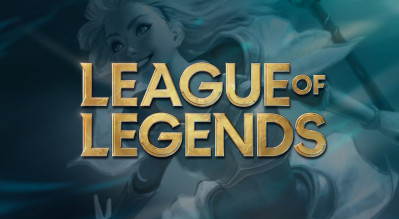
<h3><center><a href='https://mattwalters.me'>Matt Walters</a></center></h3>

# Introduction

League of Legends is a multiplayer online battle arena (MOBA) released by Riot Games in 2009. Nobody could have foreseen the meteoric rise to popularity that League of Legends saw over the course of the next few years. By 2012, League of Legends was the most popular game in North America and Europe based on the number of hours played. This popularity sparked a growing interest in the creation of a League of Legends eSports scene, which is exactly what was done at Dreamhack in 2011. The first League of Legends world championship was held at Dreamhack in 2011 for a prize pool of \$50,000, and so began the professional League of Legends scene.

The data in this tutorial is going to come from professional League of Legends games that took place between 2015 and 2018. Specifically our data will come from a [Kaggle dataset](https://www.kaggle.com/chuckephron/leagueoflegends#gold.csv) simply titled 'League of Legends'. This provides us with a good chunk of the games that have taken place in the League of Legends professional scene and allows us to draw conclusions about the data provided to us.

Using this data, we will explore the data science pipeline in relation to the analysis of this League of Legends match data. We will specifically discuss data cleaning and management, data analysis through visualization, data classification, and how to draw conclusions from the results we generate. Our goal is to provide valuable information and conclusions for someone who might be trying to draw their own conclusions from a League of Legends match that they're analyzing.

# Setup

Before we can start working with our data, there are a few Python libraries that will want to download so that we can have access to advanced data analysis and machine learning functions.

Run the following to get your environment setup:

[Pandas](https://pandas.pydata.org/pandas-docs/stable/tutorials.html): `pip install pandas`<br>
[NumPy](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html): `pip install numpy`<br>
[Scikit-Learn](http://scikit-learn.org/stable/): `pip install scikit-learn`<br>
[MatPlotLib](https://matplotlib.org/): `pip install matplotlib`<br>
[Seaborn](https://seaborn.pydata.org/): `pip install seaborn`<br>

We'll also go ahead and import all of the required libraries with the following block of code now that we have the missing ones installed.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDClassifier
import ast
import warnings
warnings.filterwarnings('ignore')

# Loading the Match Data

So the first step in our data science is loading in the data so that we can get it into a workable state. In our particular case, we've downloaded our CSV dataset from Kaggle (as previously mentioned) and will load it directly into Pandas.

In [192]:
lol_data = pd.read_csv("leagueoflegends/LeagueofLegends.csv")

Now let's take a quick look at the dataset so that we can verify what it looks like:

In [193]:
lol_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


From this we can make sure that all of the expected columns exist in the datasets while also getting an idea of what the data looks like in each column so that we know what types of values we're working with.

In lol_data we have a bunch of information about each map from team members and champion picks, to a minute-by-minute gold breakdown of exactly how much gold each team member earned.

Now that we have the data loaded into Pandas, we can do some work to begin checking the data and making sure that it is clean for data analysis.

# Cleaning the Data and Preparing it for Analysis

So the first thing that we'll notice about our datasets is that they have a large number of columns. It's highly unlikely that we'll need all of the columns so it would make sense to delete the ones we won't need and just keep the ones that are useful for us. In the case of gold_data, we actually will need all of the different columns because we want to be able to do an analysis of the gold difference over time. But in lol_data we can drop things like the names of the players, ... because we don't plan on using these columns in our data analysis. 

We can also delete any rows that aren't associated with the North American League of Legends Championship Series (NALCS), the Euopean League of Legends Championship Series (EULCS), or the League of Legends Champions Korea (LCK) because these are the largest, most serious, and competitive leagues in the professional League of Legends scene. The teams from these 3 regions are the only ones who have won the world championship with teams from South Korea taking it . Speaking of which, we also want to keep any values with WC (World Championship), MSI (Mid-Season Invitational), and IEM (Intel Extreme Masters) in the League column. These are some of the biggest League of Legends tournaments where the best players from around the globe are able to play with one another. Their game data will definitely be valuable for analysis of professional play.

In [194]:
if {'redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport', 'rKills', 'rTowers', 'rInhibs', 'rBarons', 'rHeralds', 'blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport', 'bKills', 'bTowers', 'bInhibs', 'bBarons', 'bHeralds'}.issubset(lol_data.columns):
    lol_data = lol_data.drop(['redTop', 'redJungle', 'redMiddle', 'redADC', 'redSupport', 'rKills', 'rTowers', 'rInhibs', 'rBarons', 'rHeralds', 'blueTop', 'blueJungle', 'blueMiddle', 'blueADC', 'blueSupport', 'bKills', 'bTowers', 'bInhibs', 'bBarons', 'bHeralds'], axis=1)

# Only pull the data that has the Leagues/Tournaments we're interested in
leagues = ["NALCS", "EULCS", "WC", "MSI", "IEM"]
lol_data = lol_data.loc[lol_data.League.isin(leagues)]
lol_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redJungleChamp,goldredJungle,redMiddleChamp,goldredMiddle,redADCChamp,goldredADC,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Elise,"[475, 475, 532, 898, 1192, 1429, 1819, 2107, 2...",Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,JarvanIV,"[475, 475, 532, 909, 1105, 1423, 1536, 1732, 1...",Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,LeeSin,"[475, 475, 533, 845, 1089, 1443, 1694, 1914, 2...",Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Nunu,"[475, 475, 541, 832, 1171, 1385, 1770, 2087, 2...",Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,RekSai,"[475, 475, 532, 896, 1220, 1444, 1828, 2042, 2...",Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


#### Perfect!

We now have a dataset that is only 37 columns instead of 57 because we were able to trim off the columns that we had no intention of using for our data analysis. Now typically, the next step in our data tidying would be to clean up any null values in our dataset. But as we can see from this command: 

In [195]:
lol_data.isnull().sum()

League              0
Year                0
Season              0
Type                0
blueTeamTag         0
bResult             0
rResult             0
redTeamTag          0
gamelength          0
golddiff            0
goldblue            0
bDragons            0
goldred             0
rDragons            0
blueTopChamp        0
goldblueTop         0
blueJungleChamp     0
goldblueJungle      0
blueMiddleChamp     0
goldblueMiddle      0
blueADCChamp        0
goldblueADC         0
blueSupportChamp    0
goldblueSupport     0
blueBans            0
redTopChamp         0
goldredTop          0
redJungleChamp      0
goldredJungle       0
redMiddleChamp      0
goldredMiddle       0
redADCChamp         0
goldredADC          0
redSupportChamp     0
goldredSupport      0
redBans             0
Address             0
dtype: int64

None of our columns have null values! It is extremely fortunate that this data is so well maintained because it is fairly unlikely that other data that might be presented to you would be absent of null values. For the sake of thoroughness I will still touch on some of the ideas that surround data tidying and working with null values to bring them to a workable state.

There are many common methods for dealing with missing or null values. One of the most prevalent ideologies in data science is the idea of [imputation](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779) which means replacing missing values with a specific value that you decide on. There are many different ways to impute data and the way that it's done is specific to your dataset and the work that you'll be doing with it. 

However, even though imputation is certainly more standard in the data science field, some people will remove null values altogether. Perhaps your data analysis does not require the entire dataset and removing the missing data will not impact your analysis. As said before, this is really up to the discretion of the data analyst.

So if your data does have null or missing values, consider using the Pandas function `pd.dropna()` to remove them from your dataset.

After fixing the missing or null data, we would then want to transform our data (often using `pd.groupby()` functions) to make our data more readable or easier to work with. It's invaluable for any data analyst to take some time to consider exactly what sort of data analysis they want to be doing so that they can have an idea of what the most workable dataset looks like.

In our particular case, our data is given to us such that the information about each team is broken up by blue and red side. This makes sense for the nature of the data, but we're not interested in which side was blue and which side was red because it doesn't have a serious* impact on the game.

We want to categorize our data such that it's easy to access the values associated with the team who won and the values associated with the team who lost. We're going to make subsets of the dataset that have the winning information and the losing information, and add that data into new, more accurately named columns.

<i>*Studies have been done that show that the blue side has a slightly higher chance of winning, but the difference is neglible and thereby not useful for us</i>

In [196]:
orig_red_blue_data = lol_data
lol_blue_win_data = lol_data[lol_data['bResult'] == 1]
lol_red_win_data = lol_data[lol_data['rResult'] == 1]
lol_blue_loss_data = lol_data[lol_data['bResult'] == 0]
lol_red_loss_data = lol_data[lol_data['rResult'] == 0]

# This wall of code creates new columns that categorize our values by win instead of by red or blue side
lol_data["newAddress"] = lol_blue_win_data["Address"].append(lol_red_win_data["Address"])
lol_data["winTeamTag"] = lol_blue_win_data["blueTeamTag"].append(lol_red_win_data["redTeamTag"])
lol_data["goldWin"] = lol_blue_win_data["goldblue"].append(lol_red_win_data["goldred"])
lol_data["wDragons"] = lol_blue_win_data["bDragons"].append(lol_red_win_data["rDragons"])
lol_data["winBans"] = lol_blue_win_data["blueBans"].append(lol_red_win_data["redBans"])
lol_data["winTopChamp"] = lol_blue_win_data["blueTopChamp"].append(lol_red_win_data["redTopChamp"])
lol_data["goldwinTop"] = lol_blue_win_data["goldblueTop"].append(lol_red_win_data["goldredTop"])
lol_data["winJungleChamp"] = lol_blue_win_data["blueJungleChamp"].append(lol_red_win_data["redJungleChamp"])
lol_data["goldwinJungle"] = lol_blue_win_data["goldblueJungle"].append(lol_red_win_data["goldredJungle"])
lol_data["winMiddleChamp"] = lol_blue_win_data["blueMiddleChamp"].append(lol_red_win_data["redMiddleChamp"])
lol_data["goldwinMiddle"] = lol_blue_win_data["goldblueMiddle"].append(lol_red_win_data["goldredMiddle"])
lol_data["winADCChamp"] = lol_blue_win_data["blueADCChamp"].append(lol_red_win_data["redADCChamp"])
lol_data["goldwinADC"] = lol_blue_win_data["goldblueADC"].append(lol_red_win_data["goldredADC"])
lol_data["winSupportChamp"] = lol_blue_win_data["blueSupportChamp"].append(lol_red_win_data["redSupportChamp"])
lol_data["goldwinSupport"] = lol_blue_win_data["goldblueTop"].append(lol_red_win_data["goldredSupport"])

# This second wall of code creates new columns that categorize our values by loss. The red loss data has to be
# inserted first because the blue win data was inserted first previously. This way the values will match up
# correctly.
lol_data["lossTeamTag"] = lol_red_loss_data["redTeamTag"].append(lol_blue_loss_data["blueTeamTag"])
lol_data["goldLoss"] = lol_red_loss_data["goldred"].append(lol_blue_loss_data["goldblue"])
lol_data["lDragons"] = lol_red_loss_data["rDragons"].append(lol_blue_loss_data["bDragons"])
lol_data["lossBans"] = lol_red_loss_data["redBans"].append(lol_blue_loss_data["blueBans"])
lol_data["lossTopChamp"] = lol_red_loss_data["redTopChamp"].append(lol_blue_loss_data["blueTopChamp"])
lol_data["goldlossTop"] = lol_red_loss_data["goldredTop"].append(lol_blue_loss_data["goldblueTop"])
lol_data["lossJungleChamp"] = lol_red_loss_data["redJungleChamp"].append(lol_blue_loss_data["blueJungleChamp"])
lol_data["goldlossJungle"] = lol_red_loss_data["goldredJungle"].append(lol_blue_loss_data["goldblueJungle"])
lol_data["lossMiddleChamp"] = lol_red_loss_data["redMiddleChamp"].append(lol_blue_loss_data["blueMiddleChamp"])
lol_data["goldlossMiddle"] = lol_red_loss_data["goldredMiddle"].append(lol_blue_loss_data["goldblueMiddle"])
lol_data["lossADCChamp"] = lol_red_loss_data["redADCChamp"].append(lol_blue_loss_data["blueADCChamp"])
lol_data["goldlossADC"] = lol_red_loss_data["goldredADC"].append(lol_blue_loss_data["goldblueADC"])
lol_data["lossSupportChamp"] = lol_red_loss_data["redSupportChamp"].append(lol_blue_loss_data["blueSupportChamp"])
lol_data["goldlossSupport"] = lol_red_loss_data["goldredSupport"].append(lol_blue_loss_data["goldblueTop"])

lol_data['Address'] = lol_data['newAddress']

lol_data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,lossTopChamp,goldlossTop,lossJungleChamp,goldlossJungle,lossMiddleChamp,goldlossMiddle,lossADCChamp,goldlossADC,lossSupportChamp,goldlossSupport
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Gnar,"[475, 475, 532, 728, 958, 1284, 1526, 1912, 21...",Elise,"[475, 475, 532, 898, 1192, 1429, 1819, 2107, 2...",Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14..."
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2...",Rengar,"[475, 475, 532, 895, 1176, 1334, 1447, 1859, 2...",Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...",Caitlyn,"[475, 475, 532, 856, 1182, 1468, 1653, 1890, 2...",Leona,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2..."
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Sion,"[475, 475, 533, 706, 861, 1123, 1491, 1698, 18...",LeeSin,"[475, 475, 533, 845, 1089, 1443, 1694, 1914, 2...",Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14..."
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Irelia,"[475, 475, 532, 646, 992, 1253, 1408, 1752, 21...",JarvanIV,"[475, 475, 532, 909, 1272, 1387, 1705, 2009, 2...",Leblanc,"[475, 475, 532, 801, 1066, 1409, 1660, 2077, 2...",Sivir,"[475, 475, 532, 791, 1202, 1383, 1752, 2121, 2...",Thresh,"[475, 475, 532, 646, 992, 1253, 1408, 1752, 21..."
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Sion,"[475, 475, 532, 820, 1025, 1290, 1598, 1953, 2...",RekSai,"[475, 475, 532, 896, 1220, 1444, 1828, 2042, 2...",Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136..."


Now that we have added columns that are based on the winning and losing teams, we can remove the columns associated with the red side and the blue side information from our data.

In [197]:
lol_data = lol_data.drop(['newAddress', 'blueTeamTag', 'redTeamTag', 'goldblue', 'goldred', \
                          'bDragons', 'rDragons', 'blueBans', 'redBans',\
                         'blueTopChamp', 'goldblueTop', 'redTopChamp', 'goldredTop', \
                         'blueJungleChamp', 'goldblueJungle', 'redJungleChamp', 'goldredJungle', \
                         'blueMiddleChamp', 'goldblueMiddle', 'redMiddleChamp', 'goldredMiddle', \
                         'blueADCChamp', 'goldblueADC', 'redADCChamp', 'goldredADC', \
                         'blueSupportChamp', 'goldblueSupport', 'redSupportChamp', 'goldredSupport', \
                         'bResult', 'rResult'], axis=1)

print(lol_data.columns)

Index(['League', 'Year', 'Season', 'Type', 'gamelength', 'golddiff', 'Address',
       'winTeamTag', 'goldWin', 'wDragons', 'winBans', 'winTopChamp',
       'goldwinTop', 'winJungleChamp', 'goldwinJungle', 'winMiddleChamp',
       'goldwinMiddle', 'winADCChamp', 'goldwinADC', 'winSupportChamp',
       'goldwinSupport', 'lossTeamTag', 'goldLoss', 'lDragons', 'lossBans',
       'lossTopChamp', 'goldlossTop', 'lossJungleChamp', 'goldlossJungle',
       'lossMiddleChamp', 'goldlossMiddle', 'lossADCChamp', 'goldlossADC',
       'lossSupportChamp', 'goldlossSupport'],
      dtype='object')


From this we can see that all of the columns associated with the red and blue side have been removed. All we have left are the columns that we created that are based on the winning team and the losing team.

Now that we've gone through the work of removing unnecessary rows, handling null or missing values, and changing the way our data was split up, we finally have a dataset that we can use for our analysis!<br>

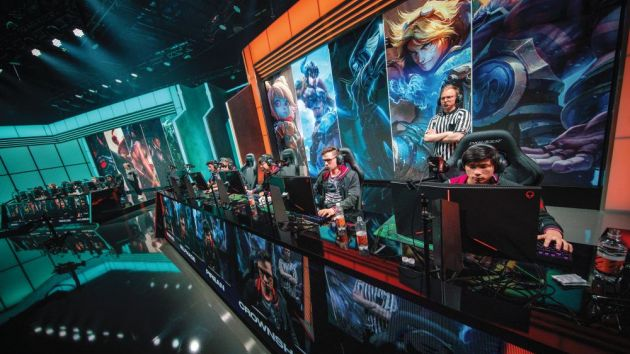
<center><i>SK Gaming, a professional League of Legends organization, at a match</i></center>

# Exploratory Data Analysis

Now that we have data that we can work with, we want to begin doing some analysis of it so that we can begin to draw conclusions about the data. This will involve data visualization where we plot our information in a more human-readable format that allows us to easily visualize the conclusions that we're drawing from our data.

One important thing to note is that we are going to treat the blue side winning as a "Win" and the blue side losing as a "Loss". we have the data

## Graphing Champion Picks vs. Wins/Losses

A simple idea that we can begin to look it is how frequently a champion (character) is picked and how often that pick results in a win or loss. Now this isn't necessarily the best metric to gauge whether a team will win or lose because the League of Legends meta is constantly changing. One month, a champion might be the most popular pick and then the next it might get nerfed into the ground. 

But after seeing which champions are most consistently winning, we can then look at their consistency over time to try and understand when and how their relative strength in the League of Legends meta fluctuated.

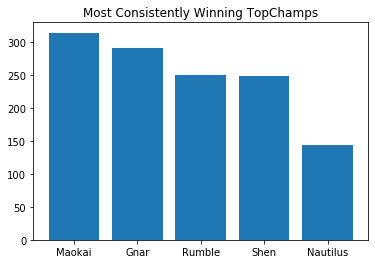

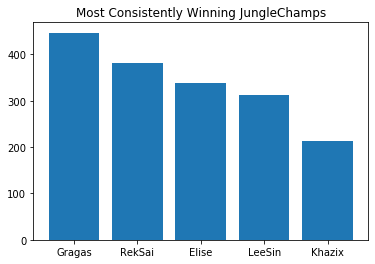

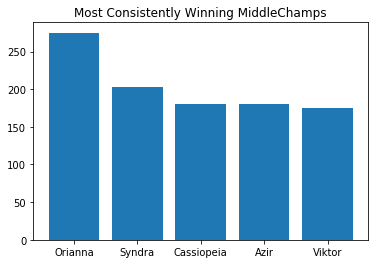

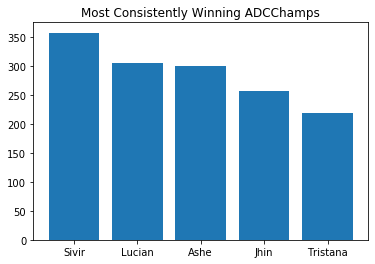

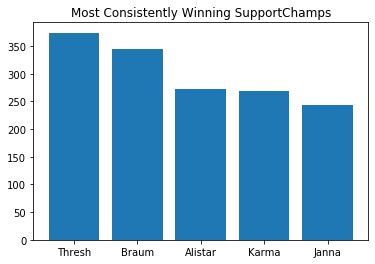

In [198]:
win_positions = ['winTopChamp', 'winJungleChamp', 'winMiddleChamp', 'winADCChamp', 'winSupportChamp']
for pos in win_positions:
    # Pick the top 5 most picked champions
    champs = lol_data[pos].value_counts().sort_values(ascending=False).iloc[:5]
    plt.bar(champs.index, champs.values)
    plt.title("Most Consistently Winning " + champs.name[3:] + "s")
    plt.show()

From this we can see that the most consistently winning top champion is Maokai, jungle champion is Gragas, middle champion is Orianna, ADC champion is Sivir, and support champion is Thresh. Let's keep these champions in mind for when we want to plot their relative strength over time.

Now we want to take a look at the most consistently losing champions so that we can find out how their relative strength in the League of Legends meta has changed over time.

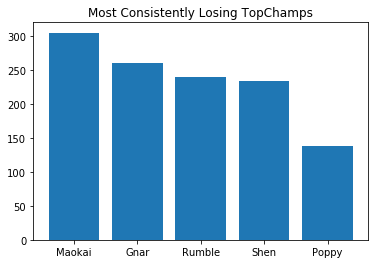

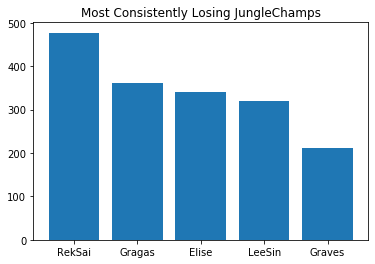

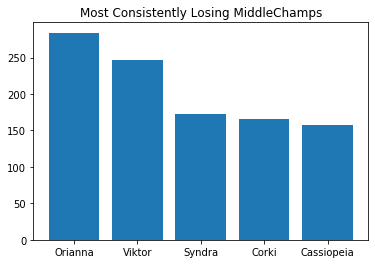

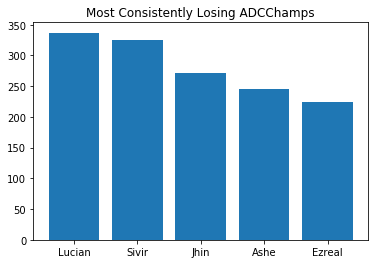

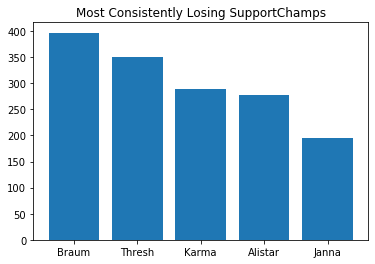

In [199]:
loss_positions = ['lossTopChamp', 'lossJungleChamp', 'lossMiddleChamp', 'lossADCChamp', 'lossSupportChamp']
for pos in loss_positions:
    # Pick the top 5 most picked champions
    champs = lol_data[pos].value_counts().sort_values(ascending=False).iloc[:5]
    plt.bar(champs.index, champs.values)
    plt.title("Most Consistently Losing " + champs.name[4:] + "s")
    plt.show()

Based on the data we can see that the most consistently losing top champion is Maokai, the jungle champion is Rek'sai, the middle champion is Orianna, the ADC champion is Lucian, and the support champion is Braum. Interesting! From this we can see that some of the champions that lose most consistently are the same as the ones that win most consistently. Perhaps this suggests the strength of a champion isn't as important as the person playing it or how the team plays together! This would especially be true in professional play where players make so few mistakes that a greater focus is placed on macro level play to snowball leads and win the game.

But still, it will be interesting to map the chance of winning over time so that we can look at how much this value might change from year to year.

In [200]:
data_2015 = lol_data[lol_data.Year == 2015]
data_2016 = lol_data[lol_data.Year == 2016]
data_2017 = lol_data[lol_data.Year == 2017]

# A function to return a dictionary that contains involvement percentage over the years for the 
# most played champions.
def get_year_data(pos_champ_dict):
    pct = {}
    for pos, champ in pos_champ_dict.items():
        if pos not in pct:
            pct[pos] = []
        
        # Calculate percentages over the years
        pct_2015 = data_2015[pos].value_counts().at[champ] / data_2015[pos].count() * 100
        pct[pos].append(pct_2015)
        pct_2016 = data_2016[pos].value_counts().at[champ] / data_2016[pos].count() * 100
        pct[pos].append(pct_2016)
        pct_2017 = data_2017[pos].value_counts().at[champ] / data_2017[pos].count() * 100
        pct[pos].append(pct_2017)
    
    return pct

win_champions = {'winTopChamp': 'Maokai', 'winJungleChamp': 'Gragas', 'winMiddleChamp': 'Orianna', \
                'winADCChamp': 'Sivir', 'winSupportChamp': 'Thresh'}
win_pct = get_year_data(win_champions)


loss_champions = {'lossTopChamp': 'Maokai', 'lossJungleChamp': "RekSai", 'lossMiddleChamp': 'Orianna', \
                'lossADCChamp': 'Lucian', 'lossSupportChamp': 'Braum'}
loss_pct = get_year_data(loss_champions)

#### Winning Percentages

In [201]:
print(win_pct)

{'winTopChamp': [17.108753315649867, 6.047516198704104, 9.99083409715857], 'winJungleChamp': [17.108753315649867, 17.60259179265659, 13.01558203483043], 'winMiddleChamp': [9.283819628647215, 3.2397408207343417, 14.57378551787351], 'winADCChamp': [20.424403183023873, 17.062634989200866, 4.032997250229148], 'winSupportChamp': [19.363395225464192, 7.235421166306695, 11.45737855178735]}


#### Loss Percentages

In [202]:
print(loss_pct)

{'lossTopChamp': [16.445623342175068, 7.127429805615551, 9.440879926672777], 'lossJungleChamp': [22.546419098143236, 21.922246220302377, 9.074243813015583], 'lossMiddleChamp': [9.151193633952255, 3.6717062634989204, 14.940421631530706], 'lossADCChamp': [11.803713527851459, 21.27429805615551, 2.749770852428964], 'lossSupportChamp': [7.5596816976127315, 24.190064794816415, 8.065994500458295]}


After running the previous block of code we can see that we are left with two dictionaries, both of the same format. The first one is for the winning data and the second is for the losing data. The dictionaries have the player's position as the keys and then a list of the percentage of games that the winning-est or losing-est champion was played in a particular position.

Now we can graph the change in the presence of these champions in winning games and losing games over the course of three years.

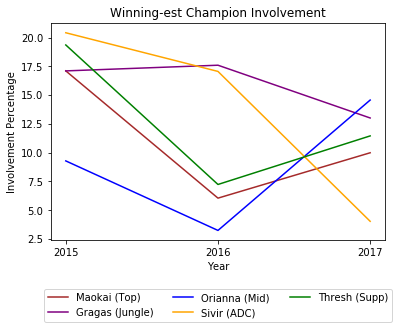

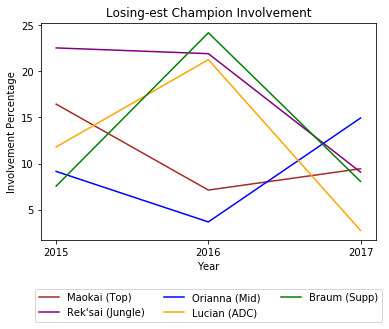

In [203]:
x = [2015, 2016, 2017]
xi = list(range(len(x)))
# Plot each line individually
plt.plot(xi, win_pct['winTopChamp'], color='brown', label='Maokai (Top)')
plt.plot(xi, win_pct['winJungleChamp'], color='purple', label='Gragas (Jungle)')
plt.plot(xi, win_pct['winMiddleChamp'], color='blue', label='Orianna (Mid)')
plt.plot(xi, win_pct['winADCChamp'], color='orange', label='Sivir (ADC)')
plt.plot(xi, win_pct['winSupportChamp'], color='green', label='Thresh (Supp)')
plt.xlabel('Year')
plt.ylabel('Involvement Percentage')
plt.xticks(xi, x)
plt.title('Winning-est Champion Involvement')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.show()

# Again, plot each line
plt.plot(xi, loss_pct['lossTopChamp'], color='brown', label='Maokai (Top)')
plt.plot(xi, loss_pct['lossJungleChamp'], color='purple', label='Rek\'sai (Jungle)')
plt.plot(xi, loss_pct['lossMiddleChamp'], color='blue', label='Orianna (Mid)')
plt.plot(xi, loss_pct['lossADCChamp'], color='orange', label='Lucian (ADC)')
plt.plot(xi, loss_pct['lossSupportChamp'], color='green', label='Braum (Supp)')
plt.xlabel('Year')
plt.ylabel('Involvement Percentage')
plt.xticks(xi, x)
plt.title('Losing-est Champion Involvement')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.show()

Now that we can see how often people choose a champion and win over time and how often people choose a champion and lose over time, we can begin to draw some conclusions about our data.

One of the most immediately noticeable changes in champion usage is Sivir as an ADC among the winning teams. It makes sense that Sivir was such a highly contested pick in 2015 because not only was she a very strong ADC, but also was able to support her team in terms of the utility she provides. But after 2015 she started to see a sharp decline in her usage among winning ADC's. If you look at the patch notes around this time, this actually makes a lot of sense. [Patch 6.17](https://na.leagueoflegends.com/en/news/game-updates/patch/patch-617-notes), released August 23, 2016, included a heavy nerf to Sivir in terms of her damage AND utility. This immediately caused Sivir to drop out of play in the pro scene as the nerf left Sivir almost objectively worse than other ADC's. Sivir has since stayed irrelevant and does not see much action in the current League of Legends professional scene.

One of the champions with the most consistent play record in our data is Gragas in the jungle role. Over the course of the three years, he stays relevant and is in a consistent percentage (hovering around 17.5%) of professional games. This makes sense because of his game-changing ultimate that can isolate high-priority enemies and change the tide of a game. Essentially even if Gragas becomes weak as a champion, he will still be able to provide his team with a high amount of utility through the displacement in his ultimate. Gragas has since become much weaker as a champion, but is still a pick that professional players will take advantage of if they feel that the opposing team has many high-priority targets.

Lastly, Orianna and Maokai have both seen a fairly consistent amount of play over the years, even though their relative strength in the meta continues to be changed. This is because Orianna and Maokai are considered some of the most balanced champions in their respective lanes. The designers never have to make too many edits to their numbers or functionality because they're following the old adage "If it ain't broke, don't fix it". They are consistently strong picks so they can sort of be considered a "default" pick if a mid laner or top laner doesn't know which champion to pick. This would explain why they see so much play in both the losing games and the winning games.

It's interesting to look at the data and see how a champion's play rate is affected by the changes made to the champion or by the benefit that the champion might provide to a team. The meta is always evolving and champions that can persist throughout all of its changes will always be great picks.

## Graphing How Gold Affects Win Percentage

One of the most interesting metrics that we can look at is the relationship between gold and how frequently a team wins. Gold is the best metric to determine how a team is doing during a League of Legends match. Everything that a team does, from getting towers to getting kills will be reflected in the total gold that the team has earned over the course of the game.

So let's take a look at the relationship between gold and win percentage.

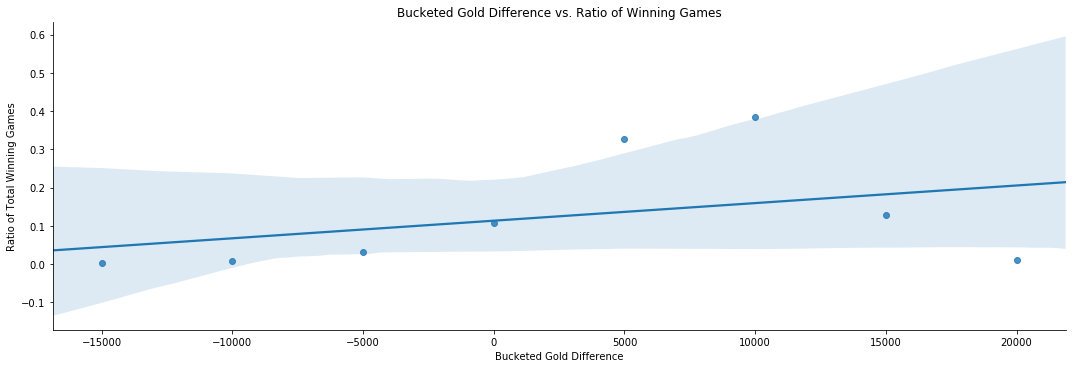

In [204]:
def parseArrayAndGetLast(val):
    return ast.literal_eval(val)[-1]

# A function that will find the last value in the gold difference array
def findLastGoldDiff(row):
    return parseArrayAndGetLast(row['goldWin']) - parseArrayAndGetLast(row['goldLoss'])

# Apply the function to all of the rows to create a new column with the final gold difference values.
lol_data['finalGoldDiff'] = lol_data.apply(lambda row: findLastGoldDiff(row), axis=1)

# Function that will compare the number of games in the bucket range to the total number of games
def bucketData(bucket_list, col):
    num_diffs = len(lol_data[col])
    bucketed_diffs = []
    # Two pointers through the array to create bucket ranges
    for i, j in zip(range(len(bucket_list)), range(len(bucket_list) - 1)):
        j += 1
        lol_data_bucket = lol_data[col].loc[(lol_data[col] >= buckets[i]) & (lol_data['finalGoldDiff'] < buckets[j])]
        bucketed_diffs.append(len(lol_data_bucket) / num_diffs)
    
    return bucketed_diffs


buckets = [-15000, -10000, -5000, 0, 5000, 10000, 15000, 20000, 25000]
bucketed_gold_diff = bucketData(buckets, 'finalGoldDiff')

# Create a dataframe so that we can use Seaborn lmplot to plot our data
bucket_df = pd.DataFrame(list(zip(buckets, bucketed_gold_diff)), columns=['years', 'bucketedDiffRatio'])

sns.lmplot(x='years', y='bucketedDiffRatio', data=bucket_df, \
           legend=False, size=5, aspect=3.0)
plt.title('Bucketed Gold Difference vs. Ratio of Winning Games')
plt.xlabel('Bucketed Gold Difference')
plt.ylabel('Ratio of Total Winning Games')
plt.show()   

From this data and line of best fit, we can see that there is a generally positive correlation between the gold difference within a certain range and the percentage of winning games where the gold difference fell within that range. The plot above shows that there is a generally normal distribution among the gold differences but that it skews a little bit positive with the new center being around 7500 gold.

The most common gold difference bucket is between 10,000 and 15,000 gold. This suggests that teams become much more likely to win a game once they break a 10,000 gold difference. So if a viewer is watching a game and sees that one of the teams has a 10,000 gold lead, they can reasonably assume that the team with the gold lead is much more likely to win the game.

But another important point to note, is that even though it is rare, some teams are able to win games from incredible gold deficits. The graph shows us that when a team is behind by -15000 to -10000 gold, they have a 0.2% of chance of winning. So even though it is VERY unlikely that a team in this position would win, it is possible!

After the 10,000 to 15,000 bucket, the portion of winning games begins to decrease again. Initally one might assume that teams that have a 15,000+ gold lead are losing games, but the actual reason that there are fewer winning games in this range is because there are just fewer games that get to this point. It is uncommon in professional play that a team would be able to so convincingly beat another, so it makes sense that there would be fewer winning games within these buckets. So don't assume that teams will begin to lose once they reach this goal treshold. The actual takeaway is that once a team breaks a positive 10,000 gold difference, it is very unlikely that they'll lose. 

## Looking at Dragons vs Winning

One of the most important indicators of how a team is performing in a League of Legends match is their ability to secure the dragon. If a team has a strong early game, then they will be to establish control of the bottom side of the map through general vision control (proper warding, vision denial). This will allow them to set up a dragon fight that can force the other team to contest, and subsequently lose a disadvantageous fight, or lose the dragon uncontested.

The dragon is a powerful objective that can be a great indicator of whether or not a team will win. We can specifically plot how many dragons each winning team has and how many dragons each losing team has. We can then compare the two and see if there is a great difference between the number that each might have.

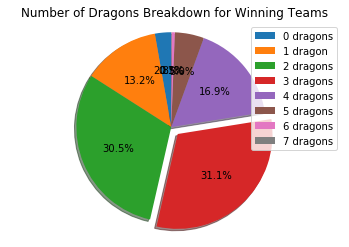

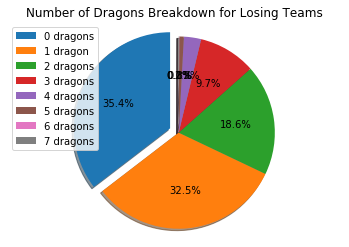

In [205]:
def dragonArrayLength(row, col):
    return len(ast.literal_eval(row[col]))

# Get the length of the dragon array in each column
lol_data['numWDragons'] = lol_data.apply(lambda row: dragonArrayLength(row, 'wDragons'), axis=1)
lol_data['numLDragons'] = lol_data.apply(lambda row: dragonArrayLength(row, 'lDragons'), axis=1)

# Get the count of each number of dragons for wins and losses
num_w_dragons = lol_data['numWDragons'].value_counts().sort_index()
num_l_dragons = lol_data['numLDragons'].value_counts().sort_index()

# Put all of the count values in two different arrays. One for wins, one for losses.
winning_x = []
for index, dragon_count in num_w_dragons.items():
    winning_x.append(dragon_count)

losing_x = []
for index, dragon_count in num_l_dragons.items():
    losing_x.append(dragon_count)
    
# Labels for the pie chart
labels = '0 dragons', '1 dragon', '2 dragons', '3 dragons', '4 dragons', '5 dragons', '6 dragons', '7 dragons'

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0, 0, 0.1, 0, 0, 0, 0)
plt.title('Number of Dragons Breakdown for Winning Teams')
plt.pie(winning_x, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(labels=labels)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
plt.title('Number of Dragons Breakdown for Losing Teams')
plt.pie(losing_x, explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(labels=labels)
plt.axis('equal')
plt.show()

From this data we can clearly see that it is more advantageous to have more dragons and that it is often indicative of whether or not a team might win a game. For example, the most common number of dragons to have for a winning team is three, which comprises 31.1% of the games. But the most common number of dragons for a losing team to have is zero, which comprises 35.4% of the games.

The reason that the most common number of dragons for a winning team is three is because if a team is able to secure three dragons, then they are likely in a winning position and can take the dragon as soon as it spawns. They'll be able to consistently take the dragon while taking other objectives. But if a team has had the opportunity to secure more dragons (which is infrequent to begin with), it can be indicative of a team who had a strong early game but is unable to transition into the late game and close out the game. This would explain why there is a similarity between the slices for 5+ dragons. However, the team with more dragons obviously has an advantage, so the winning data does tend to skew a bit higher.

Overall it seems that dragon control is a good indicator of whether or not a team might win a game. Along with gold differential (as previously mentioned), this could be a good stat to keep an eye out for during a professional League of Legends match to get an idea of which team might currently be in control of the map. 

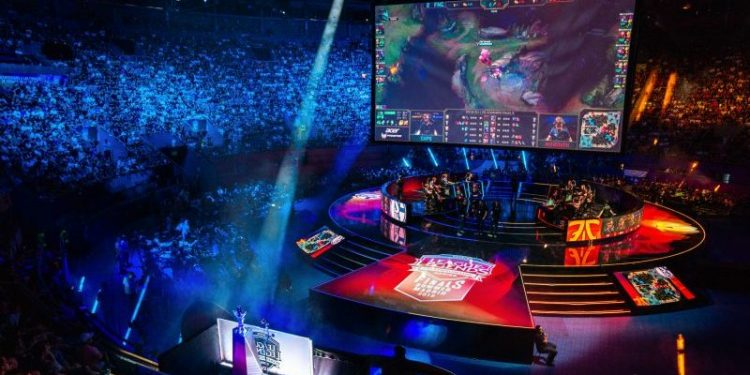
<i><center>The League of Legends World Championship</center></i>

# Classification and Predicting a Win

Now that we've visualized our data and drawn some of our own conclusions, we can begin to let the computer make it's own conclusions about our data. By using machine learning, we can analyze our data using a few different methods to see which method will make the most accurate predictions about the outcome of our game.

One important thing to note is that we will have to use our original red-side/blue-side dataset because a dataset that is based on wins and losses just has information about the winning and losing side and isn't conducive for analyzing the frequency of wins and losses themselves. If we use the original red/blue dataset, we can look at the values in each row and see how those relate to a 1 appearing in the bResult column.

In [206]:
# Set our modified dataset to the original red/blue dataset
lol_data = orig_red_blue_data

lol_data.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'golddiff', 'goldblue', 'bDragons',
       'goldred', 'rDragons', 'blueTopChamp', 'goldblueTop', 'blueJungleChamp',
       'goldblueJungle', 'blueMiddleChamp', 'goldblueMiddle', 'blueADCChamp',
       'goldblueADC', 'blueSupportChamp', 'goldblueSupport', 'blueBans',
       'redTopChamp', 'goldredTop', 'redJungleChamp', 'goldredJungle',
       'redMiddleChamp', 'goldredMiddle', 'redADCChamp', 'goldredADC',
       'redSupportChamp', 'goldredSupport', 'redBans', 'Address', 'newAddress',
       'winTeamTag', 'goldWin', 'wDragons', 'winBans', 'winTopChamp',
       'goldwinTop', 'winJungleChamp', 'goldwinJungle', 'winMiddleChamp',
       'goldwinMiddle', 'winADCChamp', 'goldwinADC', 'winSupportChamp',
       'goldwinSupport', 'lossTeamTag', 'goldLoss', 'lDragons', 'lossBans',
       'lossTopChamp', 'goldlossTop', 'lossJungleChamp', 'goldlossJungle',
       'lossMiddleChamp', 'go

Based on the columns, we can see that we have successfully copied the original red/blue dataset so that we can properly analyze the number of wins. The next that we'll want to do is to get rid of the array variables that are provided to us for gold and parse them such that we only have the last value in the array. We can do that by using the `parseArrayAndGetLast(row)` function that we wrote earlier.

In [207]:
lol_data['finalgolddiff'] = lol_data.apply(lambda row: parseArrayAndGetLast(row['golddiff']), axis=1)
lol_data['finalgoldblue'] = lol_data.apply(lambda row: parseArrayAndGetLast(row['goldblue']), axis=1)
lol_data['finalgoldred'] = lol_data.apply(lambda row: parseArrayAndGetLast(row['goldred']), axis=1)

We can use an apply function and a lambda on the column so that we can can apply the `parseArrayAndGetLast(row)` function to each value in the column. Then we want to take just the columns that we want from the dataset. We'll take information about the different teams and the gold values during the game. This way we can see how specific teams might influence our ability to predict a loss or a win.

We also want to populate the data with dummy values so that we can use it for our classification and analysis. This will create new columns for like values so that our method of classification can take the random values and use them in its data analysis so that it can draw its own conclusions. To do this we use the `pd.get_dummies()` function that comes with pandas.

Then we split the data into training and test data so that it is ready for any sort of classification or analysis that we might want to do on it.

In [208]:
lol_data = lol_data[['League', 'Year', 'Season', 'Type', 'bResult', 'blueTeamTag', 'redTeamTag', \
                     'gamelength', 'finalgolddiff', 'finalgoldblue', 'finalgoldred']]
lol_data = pd.get_dummies(lol_data)
lol_data.dropna(inplace=True)

x = lol_data
y = lol_data['bResult']

# Split data into training data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state=3)
result = np.array(y_test)
x_train['bResult'] = y_train

## Linear Discriminant Analysis

A [linear discriminant analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) is a classifier that uses a dimensionality reduction technique to reduce the number of variables (dimensions) in a dataset while maintaining as much information as possible. This helps reduce the data so that patterns can be recognized and values can begin to be classified based on their surrounding values.

In the following code block we set up a linear discriminant analysis and graph the difference between the actual values and the predictions that our classifier made. We also print out a classification report so that we can analyze the information visually and numerically.

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       141
           1       0.95      0.98      0.96       152

    accuracy                           0.96       293
   macro avg       0.96      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



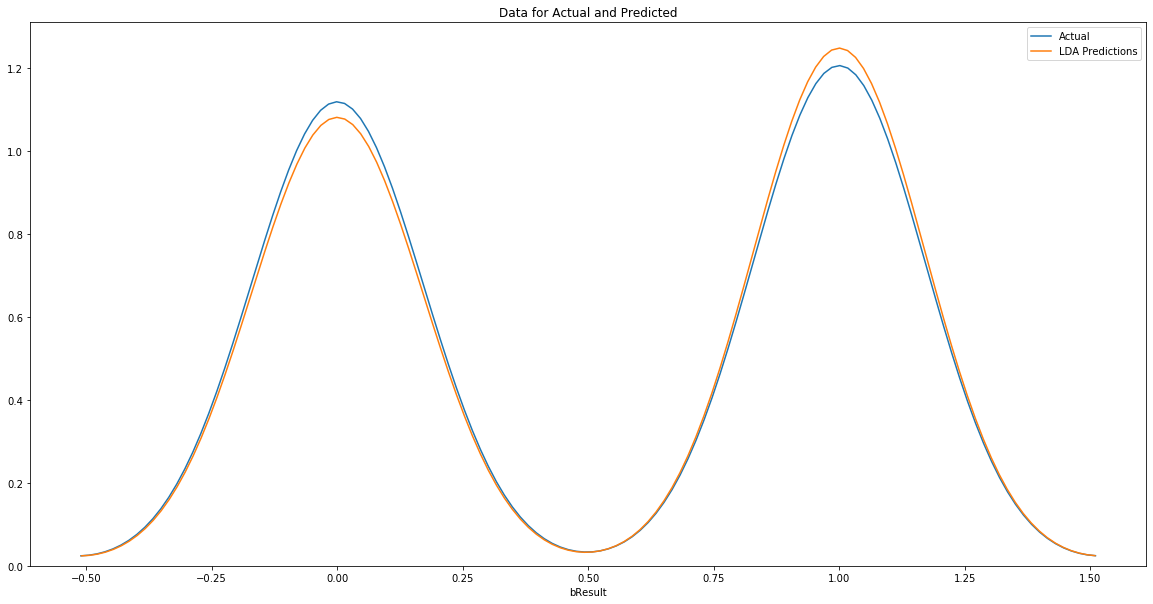

In [209]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(x_train, y_train)
basis = result
ldapred = lda.predict(x_test)

# Graph the difference between the actual and predicted win values
print(sklearn.metrics.classification_report(basis, ldapred))
figure, ax = plt.subplots(figsize=(20,10))
plt.title('Data for Actual and Predicted')
sns.distplot(y_test, hist=False, label="Actual", ax=ax)
sns.distplot(ldapred, hist=False, label="LDA Predictions", ax=ax)
plt.show()

From the classification report and the graph we can see that our code did a good job of accurately predicting wins and losses in our data. This is good because based on the data that we found in our previous analyses, there is definitely a correlation between some of the data we provided and whether or not it is indicative of a win.

We can also see based on the `f1-score` column in the classification report that our classifier was specifically 96% accurate based on its f-test. This is a great value for accuracy and it seems that linear discriminant analysis is a classifier that works well with our League of Legends data.

## Random Forest Classification

A [random forest classifier](https://www.datacamp.com/community/tutorials/random-forests-classifier-python) is a classifier that takes selected data samples and makes decision trees on them. There are four steps: select random samples, construct a decision tree and make a prediction, perform a vote for each prediction, then lastly chooses the prediction with the most votes as the final prediction.

Again we can look at the f1-score to determine the accuracy of the classifier.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       152

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



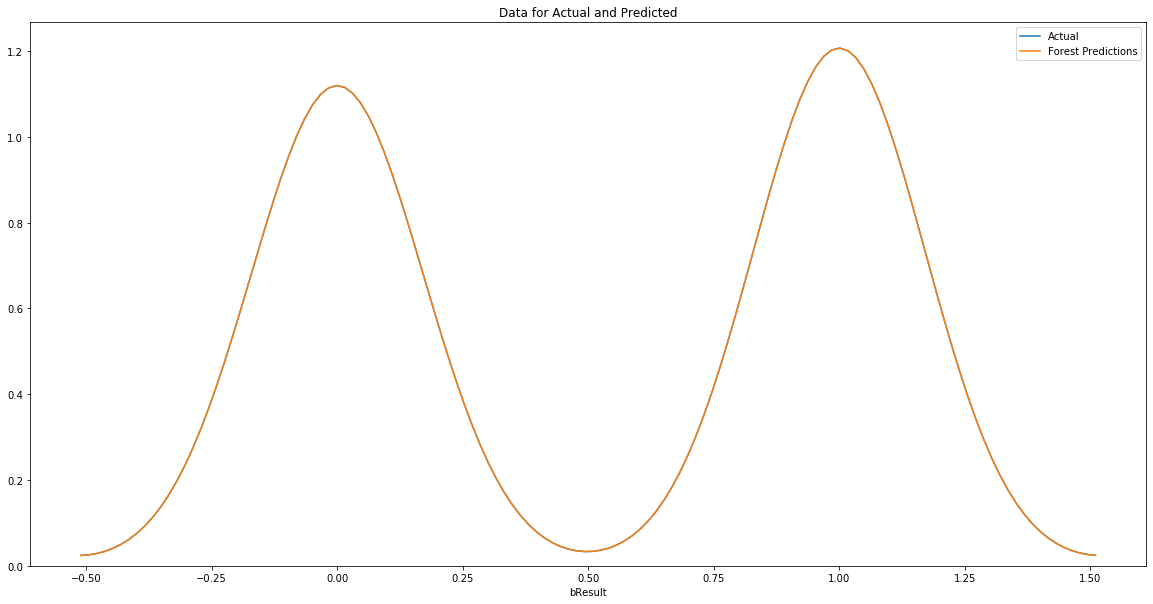

In [210]:
forest = RandomForestClassifier()
forest = forest.fit(x_train, y_train)
basis = result
forest_pred = forest.predict(x_test)

# Graph the difference between the actual and predicted win values
print(sklearn.metrics.classification_report(basis, forest_pred))
figure, ax = plt.subplots(figsize=(20,10))
plt.title('Data for Actual and Predicted')
sns.distplot(y_test, hist=False, label="Actual", ax=ax)
sns.distplot(forest_pred, hist=False, label="Forest Predictions", ax=ax)
plt.show()

Wow! Our forest classification worked with 100% accuracy. This would make sense given the quality and prevalence of the random forest algorithm in the machine learning field. Random forest is considered a highly accurate classification method due to the number of decision trees that it creates throughout its classification.

Another benefit from using random forest classification is that it doesn't suffer from any overfitting or underfitting issues because it takes the average of all of the values. This can be convenient depending on how jagged the data that you want to classify is.

Given that this classification is completely accurate, if we want to make predictions about League of Legends in the future, this would definitely be the data classification/regression method that we would want to use. It would allow us to start at 100% accuracy so that any inaccurate predictions that we make wouldn't have as great of an impact on our overall accuracy. This would hopefully result in an overall more accurate classifier that would give us the best predicted data about the future of the professional League of Legends scene.

## Gradient Descent

[Gradient descent](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f) is the backbone of most machine learning algorithms. The algorithm looks at the gradient defined in a particular location to understand which direction it should continue to look so that it can reach our guess in the most efficient way possible. We have a learning rate whose size will determine how we look at our data.

We want to be sure to find a learning rate (if we are defining it) that works well with our data so that we are not under or overstepping and preventing our algorithm from working as efficiently as possible.

In the next code block we create a gradient descent classifier and then plot the difference between our actual and predicted data.

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       141
           1       0.99      0.95      0.97       152

    accuracy                           0.97       293
   macro avg       0.97      0.97      0.97       293
weighted avg       0.97      0.97      0.97       293



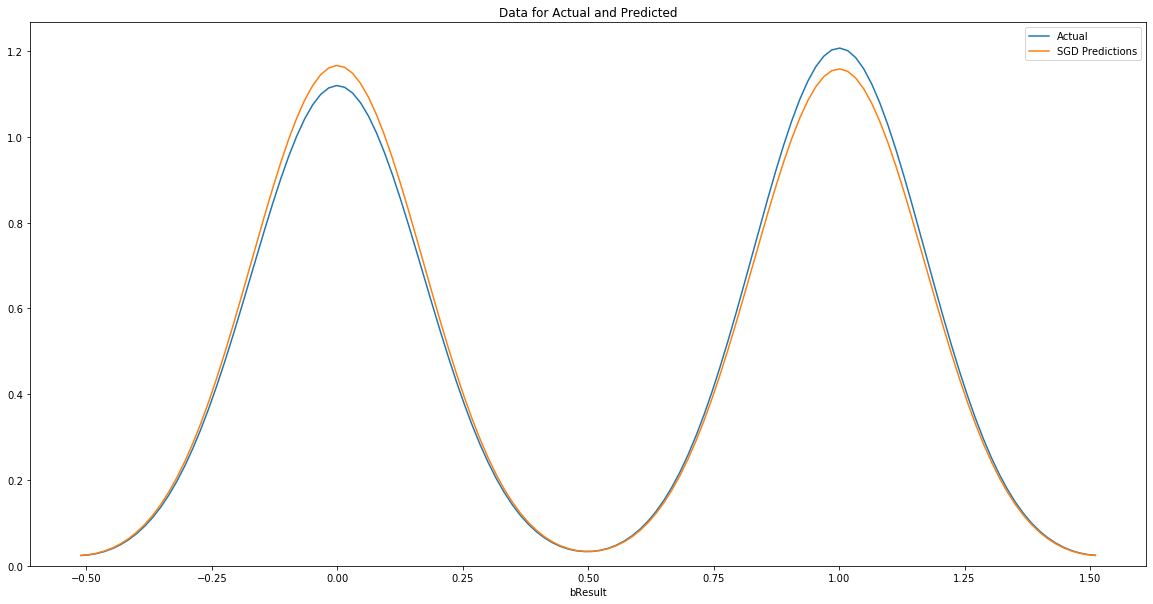

In [211]:
sgd = SGDClassifier()
sgd = sgd.fit(x_train, y_train)
basis = result
sgdpred = sgd.predict(x_test)

print(sklearn.metrics.classification_report(basis, sgdpred))
figure, ax = plt.subplots(figsize=(20,10))
plt.title('Data for Actual and Predicted')
sns.distplot(y_test, hist=False, label="Actual", ax=ax)
sns.distplot(sgdpred, hist=False, label="SGD Predictions", ax=ax)
plt.show()

The gradient descent alogrithm performed similarly to the linear discriminant analysis in that it also had an accuracy of 96%. However, the precision of these two algorithms differed slightly with LDA at 95% precise at predicting wins whereas GD was 98% precise at predicting wins.

But overall, as we can see from the graphed values, that our algorithm worked pretty well in terms of guessing whether or not a team would win based on the other values associated with it.<br>

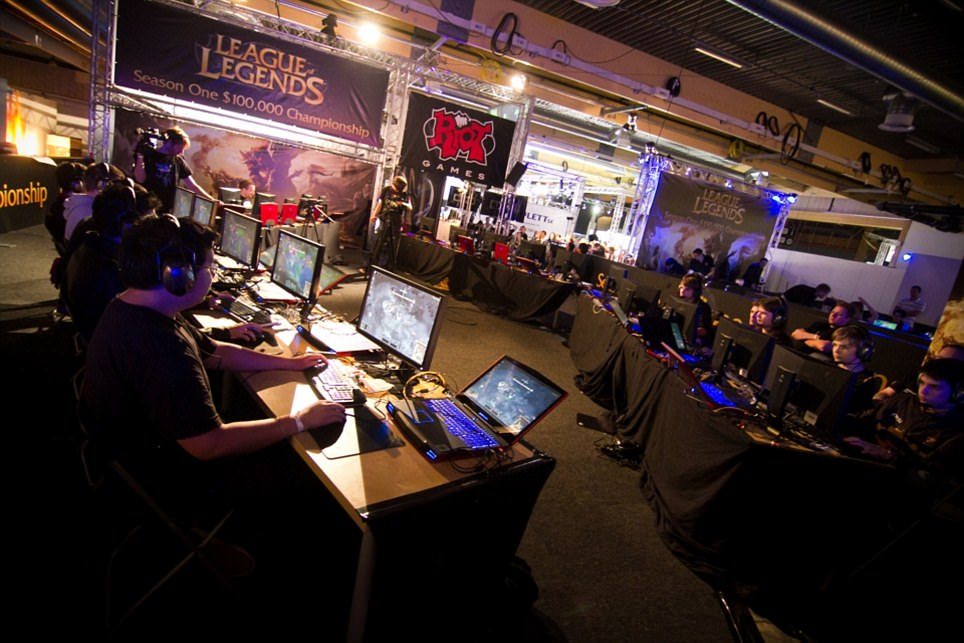
<i><center>The first professional League of Legends world championship</center></i>

# What We Learned and What's to Come

Throughout the course of this tutorial we were able to explore the data science pipeline in a few different steps. We first explored how to read in data and manipulate it so that it's in a workable state. Then once our data was easy to work with, we can to create visualizations of our data so that we would be able to make conclusions about relationships and patterns within the dataset. The value of visualizing our data is that it puts it in a format that makes sense to the human mind and allows us to clearly and quickly see the correlational qualities of our data. We then moved on to explore machine learning techniques that allow us to classify data and make predictions about data to come.

By analyzing data from professional League of Legends games, we were able to see that champion picks, gold differential, and number of dragons secured are all good indicators of whether or not a team might win a match. We were also able to look at how champion picks change over time and see how the relative strength of different champions changed from year to year.

Hopefully after reading this tutorial, you have a better understanding of what the typical data science pipeline might look like and learned a bit more about League of Legends. Looking at this professional League of Legends data allowed me to gain many new insights about the League of Legends professional scene and I hope that those of you who are interested in the same thing might explore the data even further. There is a Riot Games API that you could use that would allow you to get even more insights about League of Legends by accessing the data of the entire user base. It's nice that Riot is so willing to share their data so that data scientists like us can make exciting projects and draw even more exciting conclusions!